In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
da = pd.read_csv('us_births_69_88.csv')
#remove error dates
error_dates = [(day, month) for (month,day) in [(2,30), (2,31), (4,31), (6,31), (4,31), (6,31), (9,31), (11,31)]]#
da.drop([i for i in da.index if (da.loc[i, 'day'], da.loc[i, 'month']) in error_dates], inplace=True)
births_emp = np.array(da['births'])
births_emp = births_emp * len(births_emp)
births_mean = np.mean(births_emp)

In [4]:
# prepare buckets for sampling
buckets = [(i, -1, births_emp[i]) for i in range(len(births_emp))]

for x in range(len(buckets)):
    for a in range(len(buckets)):
        if births_emp[a] < births_mean:
            for b in range(len(buckets)):
                if births_emp[b] > births_mean:
                    buckets[b] = (buckets[b][0], buckets[b][1], buckets[b][1] - (births_mean - buckets[a][1]))
                    buckets[a] = (buckets[a][0], b, buckets[a][2])
                    break


In [5]:
N = 100000
N = 24 * N
bucket_pos = np.random.randint(0, len(births_emp), N)
bucket_births_threshold = np.random.randint(0, births_mean, N)

days = np.zeros(N)
for i in range(len(bucket_pos)):
    if bucket_births_threshold[i] <= buckets[bucket_pos[i]][2]:
        days[i] = buckets[bucket_pos[i]][0]
    else:
        days[i] = buckets[bucket_pos[i]][1]


In [7]:
def sample_until_repeat_bucket(days):
    results = []
    currGroup = set()
    for day in days:
        if day in currGroup:
            results.append(len(currGroup))
            currGroup = set()
        else:
            currGroup.add(day)
    return results


In [9]:
%%time
a = np.array(sample_until_repeat_bucket(days));

100121
CPU times: user 571 ms, sys: 4.28 ms, total: 575 ms
Wall time: 573 ms


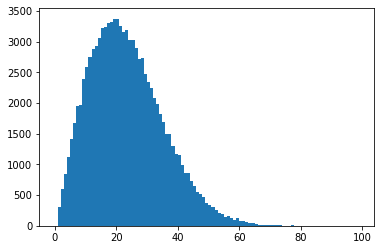

In [10]:
plt.hist(a, bins = np.arange(0,100,1));